In [1]:
CUDA_INDEX = 0
NAME = 'GED_LINUX'
CLASSES = 1

In [2]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

/home/nyati_pranav26/Pranav/gnn-x-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'neuro.viz' from '/home/nyati_pranav26/Pranav/gnn-x-experiments/GREED/greed/nbs_pred/../neuro/viz.py'>

In [4]:
model = models.NormGEDModel(8, CLASSES, 64, 64)
model.load_state_dict(torch.load(f'../runlogs/{NAME}/1621926136.1334405/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [5]:
norm_model = models.NormGEDModel(8, CLASSES, 64, 64)
norm_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Norm/1621949500.5478027/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [6]:
# nn_model = models.NeuralSiameseModel(8, CLASSES, 64, 64)
# nn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-NN/1621844409.2529492/best_model.pt', map_location='cpu'))

In [7]:
# dual_model = models.DualNormSEDModel(8, CLASSES, 64, 64)
# dual_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Dual/1621844415.90946/best_model.pt', map_location='cpu'))

In [8]:
inner_test_set, _ = torch.load(f'../data/{NAME}/inner_test.pt', map_location='cpu')
inner_queries, inner_targets, _, _ = inner_test_set

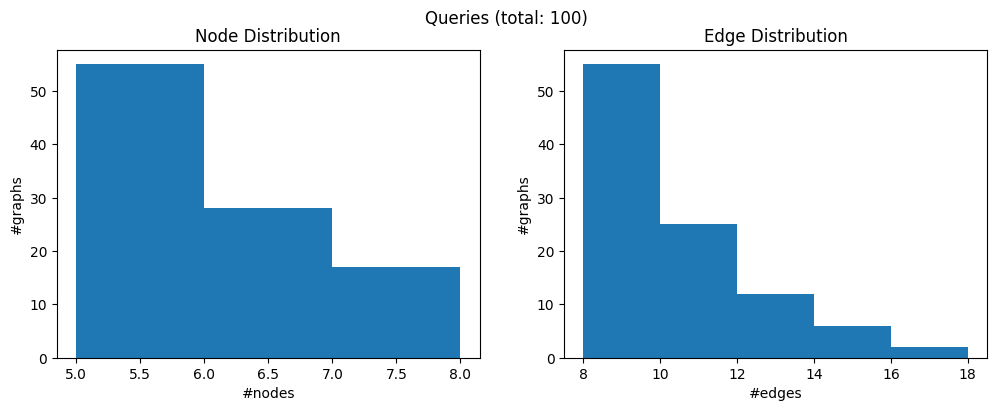

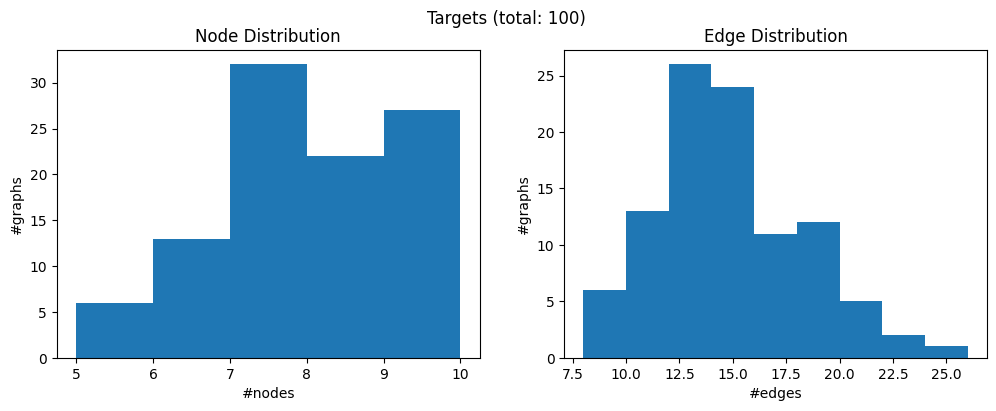

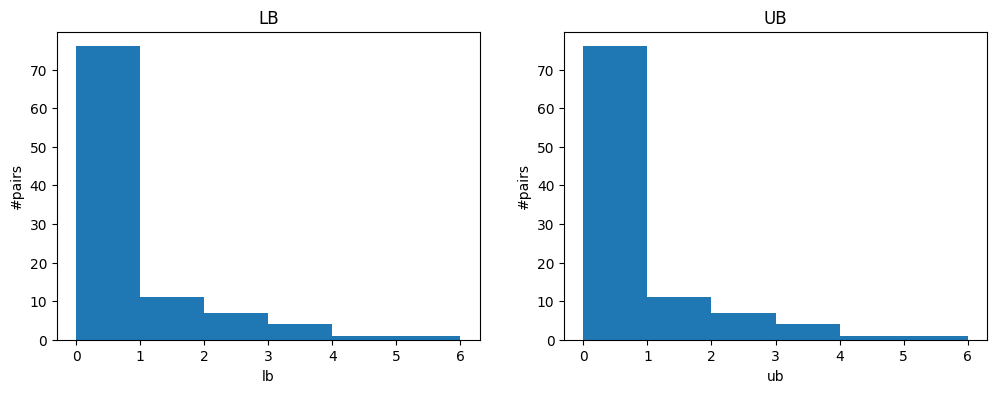

In [9]:
viz.plot_dataset_dist(inner_test_set)

In [10]:
config.n_workers = 1
tic = time.time()
inner_pred = model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(inner_pred, f'../preds/{NAME}/inner_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim prediction time: 5.216s


In [11]:
tic = time.time()
norm_inner_pred = norm_model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(norm_inner_pred, f'../preds/{NAME}/norm_inner_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f}s')

direct predict inner dataset
NeuroGSim-Norm prediction time: 0.013s


In [12]:
# tic = time.time()
# nn_inner_pred = nn_model.predict_inner(inner_queries, inner_targets)
# toc = time.time()
# torch.save(nn_inner_pred, f'../preds/{NAME}/nn_inner_pred.pt')
# print(f'NeuroGSim-NN prediction time: {toc-tic:.3f}s')

In [13]:
# tic = time.time()
# dual_inner_pred = dual_model.predict_inner(inner_queries, inner_targets)
# toc = time.time()
# torch.save(dual_inner_pred, f'../preds/{NAME}/dual_inner_pred.pt')
# print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f}s')

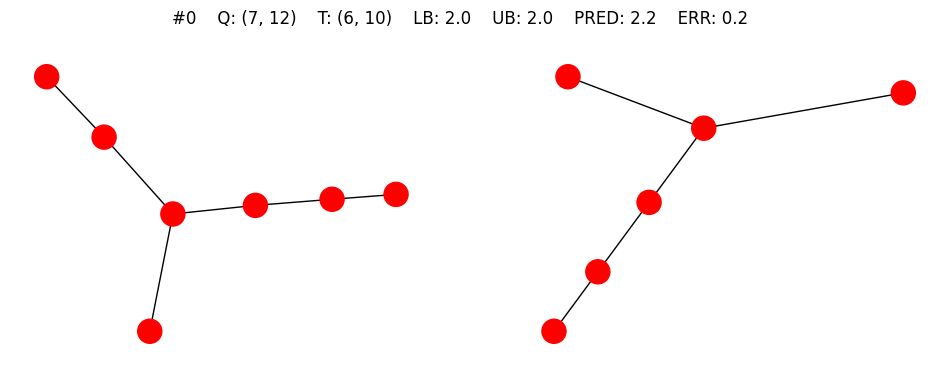

---

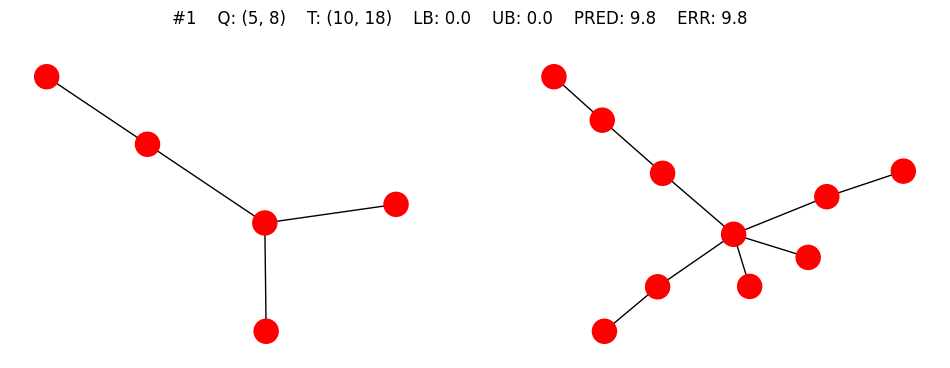

---

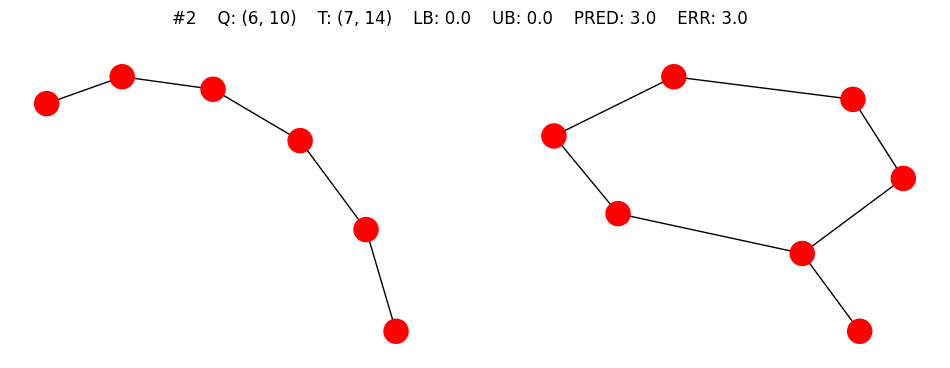

---

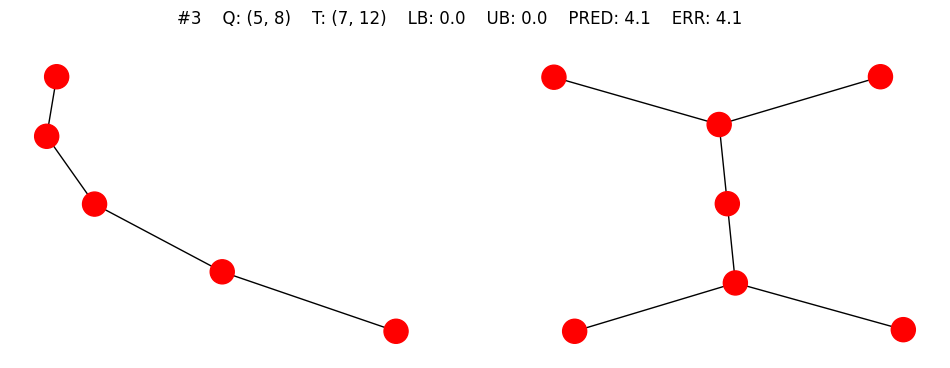

---

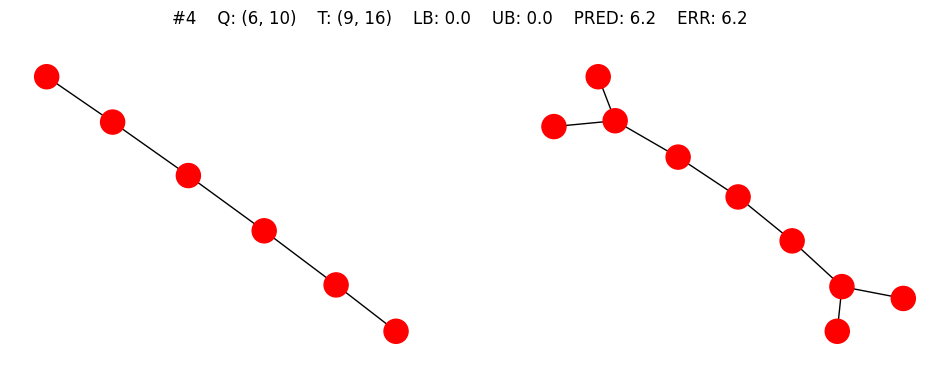

---

In [14]:
viz.plot_inner_dataset(inner_test_set, inner_pred, n_items=5)

In [15]:
config.n_workers = 1
config.method_name = ['ged_branch']
config.method_args = ['']
tic = time.time()
b_inner_lb, b_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
b_inner_pred = (b_inner_lb+b_inner_ub)/2
toc = time.time()
torch.save(b_inner_pred, f'../preds/{NAME}/b_inner_pred.pt')
print(f'Branch prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_branch']
method_args: ['']


pairs: 100%|██████████| 100/100 [00:00<00:00, 2317.56it/s]

Branch prediction time: 0.051 s 


In [16]:
config.n_workers = 1
config.method_name = ['ged_f2']
config.method_args = ['--time-limit 0.1']
tic = time.time()
f2_inner_lb, f2_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
f2_inner_pred = (f2_inner_lb+f2_inner_ub)/2
toc = time.time()
torch.save(f2_inner_pred, f'../preds/{NAME}/f2_inner_pred.pt')
print(f'F2 prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_f2']
method_args: ['--time-limit 0.1']


pairs:   5%|▌         | 5/100 [00:00<00:01, 48.66it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  30%|███       | 30/100 [00:00<00:00, 162.42it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  59%|█████▉    | 59/100 [00:00<00:00, 218.51it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs: 100%|██████████| 100/100 [00:00<00:00, 211.22it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

In [17]:
outer_test_set = torch.load(f'../data/{NAME}/outer_test.pt', map_location='cpu')
outer_queries, outer_targets, _, _ = outer_test_set

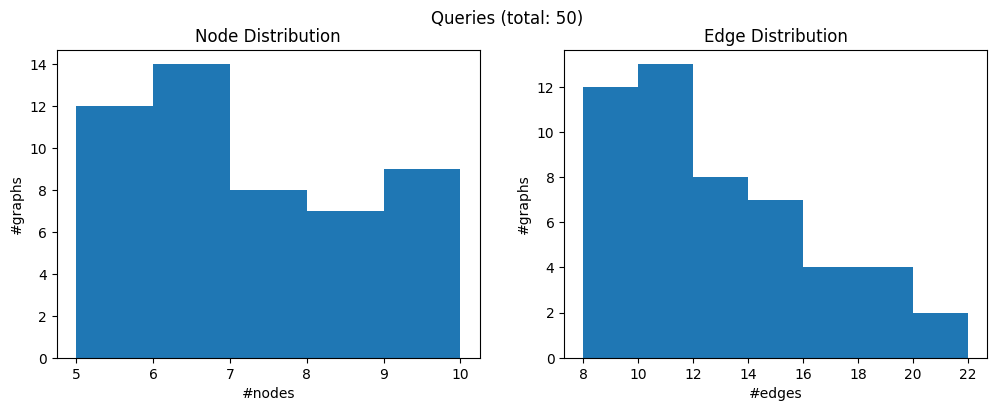

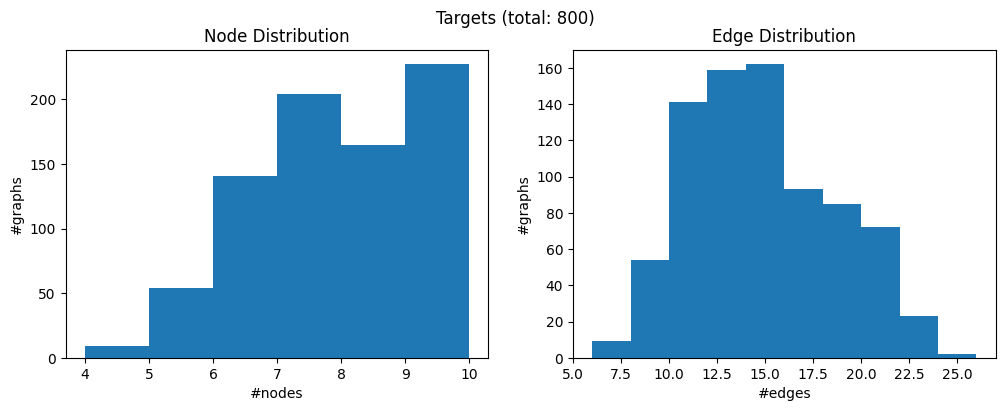

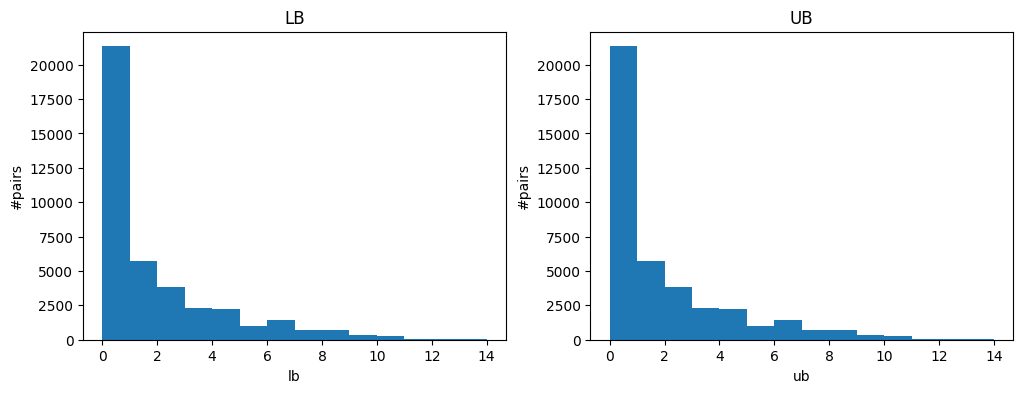

In [18]:
viz.plot_dataset_dist(outer_test_set)

In [19]:
tic = time.time()
outer_pred = model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(outer_pred, f'../preds/{NAME}/outer_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim prediction time: 0.041 s


In [20]:
tic = time.time()
norm_outer_pred = norm_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(norm_outer_pred, f'../preds/{NAME}/norm_outer_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-Norm prediction time: 0.024 s


In [21]:
# tic = time.time()
# nn_outer_pred = nn_model.predict_outer(outer_queries, outer_targets, batch_size=None)
# toc = time.time()
# torch.save(nn_outer_pred, f'../preds/{NAME}/nn_outer_pred.pt')
# print(f'NeuroGSim-NN prediction time: {toc-tic:.3f} s')

In [22]:
# tic = time.time()
# dual_outer_pred = dual_model.predict_outer(outer_queries, outer_targets, batch_size=None)
# toc = time.time()
# torch.save(dual_outer_pred, f'../preds/{NAME}/dual_outer_pred.pt')
# print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f} s')

In [24]:
torch.save(b_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/b_outer_pred.pt')

RuntimeError: shape '[50, 800]' is invalid for input of size 100

In [24]:
torch.save(f2_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/f2_outer_pred.pt')

RuntimeError: shape '[50, 800]' is invalid for input of size 100

In [ ]:
# config.n_workers = 64
# config.method_name = ['ged_branch']
# config.method_args = ['']
# tic = time.time()
# b_outer_lb, b_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
# b_outer_pred = (b_outer_lb + b_outer_ub)/2
# toc = time.time()
# torch.save(b_outer_pred, f'../preds/{NAME}/b_outer_pred.pt')
# print(f'Branch prediction time: {toc-tic:.3f} s')

In [ ]:
# config.n_workers = 64
# config.method_name = ['ged_f2']
# config.method_args = ['--time-limit 0.1']
# tic = time.time()
# f2_outer_lb, f2_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
# f2_outer_pred = (f2_outer_lb + f2_outer_ub)/2
# toc = time.time()
# torch.save(f2_outer_pred, f'../preds/{NAME}/f2_outer_pred.pt')
# print(f'F2 prediction time: {toc-tic:.3f} s')